In [234]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
!ls data

aeronave.csv		modelo_dados.png  ocorrencia_tipo.csv
fator_contribuinte.csv	ocorrencia.csv	  recomendacao.csv


## Carregamento dos dados em DataFrame

In [3]:
df_aeronave = pd.read_csv('data/aeronave.csv', sep=';')
df_fator_contribuinte = pd.read_csv('data/fator_contribuinte.csv', sep=';')
df_ocorrencia = pd.read_csv('data/ocorrencia.csv', sep=';')
df_ocorrencia_tipo = pd.read_csv('data/ocorrencia_tipo.csv', sep=';')
df_recomendacao = pd.read_csv('data/recomendacao.csv', sep=';')

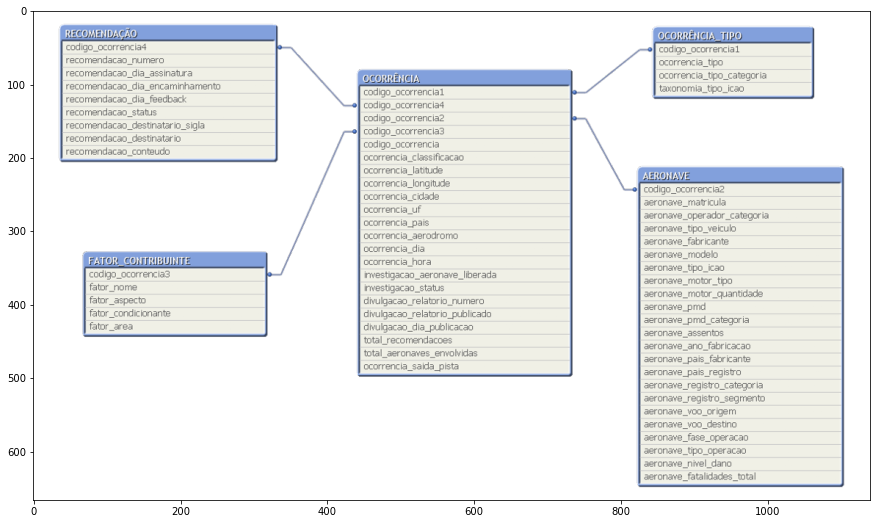

In [4]:
img_referencia = plt.imread('data/modelo_dados.png')
plt.figure(figsize=(15,15))
plt.imshow(img_referencia)

-----------------------

## Verificação Inicial dos conteúdos

In [226]:
df_ocorrencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167 entries, 0 to 5166
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   codigo_ocorrencia               5167 non-null   int64 
 1   codigo_ocorrencia1              5167 non-null   int64 
 2   codigo_ocorrencia2              5167 non-null   int64 
 3   codigo_ocorrencia3              5167 non-null   int64 
 4   codigo_ocorrencia4              5167 non-null   int64 
 5   ocorrencia_classificacao        5167 non-null   object
 6   ocorrencia_latitude             4192 non-null   object
 7   ocorrencia_longitude            4192 non-null   object
 8   ocorrencia_cidade               5167 non-null   object
 9   ocorrencia_uf                   5167 non-null   object
 10  ocorrencia_pais                 5167 non-null   object
 11  ocorrencia_aerodromo            5167 non-null   object
 12  ocorrencia_dia                  5167 non-null   

In [5]:
df_aeronave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo_ocorrencia2           5235 non-null   int64  
 1   aeronave_matricula           5235 non-null   object 
 2   aeronave_operador_categoria  5235 non-null   object 
 3   aeronave_tipo_veiculo        5235 non-null   object 
 4   aeronave_fabricante          5235 non-null   object 
 5   aeronave_modelo              5235 non-null   object 
 6   aeronave_tipo_icao           5235 non-null   object 
 7   aeronave_motor_tipo          5230 non-null   object 
 8   aeronave_motor_quantidade    5235 non-null   object 
 9   aeronave_pmd                 5235 non-null   int64  
 10  aeronave_pmd_categoria       5235 non-null   int64  
 11  aeronave_assentos            5041 non-null   float64
 12  aeronave_ano_fabricacao      5035 non-null   float64
 13  aeronave_pais_fabr

In [6]:
df_fator_contribuinte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3464 entries, 0 to 3463
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   codigo_ocorrencia3   3464 non-null   int64 
 1   fator_nome           3464 non-null   object
 2   fator_aspecto        3464 non-null   object
 3   fator_condicionante  3464 non-null   object
 4   fator_area           3464 non-null   object
dtypes: int64(1), object(4)
memory usage: 135.4+ KB


In [8]:
df_ocorrencia_tipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5347 entries, 0 to 5346
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   codigo_ocorrencia1         5347 non-null   int64 
 1   ocorrencia_tipo            5346 non-null   object
 2   ocorrencia_tipo_categoria  5346 non-null   object
 3   taxonomia_tipo_icao        5346 non-null   object
dtypes: int64(1), object(3)
memory usage: 167.2+ KB


In [9]:
df_recomendacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   codigo_ocorrencia4               1197 non-null   int64 
 1   recomendacao_numero              1197 non-null   object
 2   recomendacao_dia_assinatura      1197 non-null   object
 3   recomendacao_dia_encaminhamento  1197 non-null   object
 4   recomendacao_dia_feedback        765 non-null    object
 5   recomendacao_conteudo            1195 non-null   object
 6   recomendacao_status              1197 non-null   object
 7   recomendacao_destinatario_sigla  1197 non-null   object
 8   recomendacao_destinatario        1197 non-null   object
dtypes: int64(1), object(8)
memory usage: 84.3+ KB


---------------------

## Análises dos tipos de ocorrências

In [10]:
df_ocorrencia_tipo.ocorrencia_tipo_categoria.value_counts()

FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO MOTOR EM VOO             669
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE                      596
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE | ESTOURO DE PNEU    578
PERDA DE CONTROLE NO SOLO                                               386
PERDA DE CONTROLE EM VOO                                                325
                                                                       ... 
OUTROS | HIPÓXIA                                                          1
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE | EXPLOSÃO             1
OUTROS | CAUSADO POR RICOCHETE                                            1
RELACIONADO COM SECURITY                                                  1
POUSO AQUÉM/ALÉM DA PISTA                                                 1
Name: ocorrencia_tipo_categoria, Length: 80, dtype: int64

In [25]:
df_ocorrencia_falhas = df_ocorrencia_tipo[df_ocorrencia_tipo['ocorrencia_tipo_categoria'].str.contains("FALHA")==True]
n_falhas = df_ocorrencia_falhas.shape[0]
print(f"Número de incidentes envolvendo falhas: {n_falhas} ({100 * n_falhas / df_ocorrencia_tipo.shape[0]:.2f}%)")

Número de incidentes envolvendo falhas: 2493 (46.62%)


Temos 2493 ocorrências que foram causadas por alguma falha de equipamento/sistema, representa cerca de 46% de todas as ocorrências

In [26]:
df_ocorrencia_falhas.ocorrencia_tipo.value_counts().head()

FALHA DO MOTOR EM VOO                                 669
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE    596
ESTOURO DE PNEU                                       578
COM TREM DE POUSO                                     314
COM PARA-BRISAS / JANELA / PORTA                       67
Name: ocorrencia_tipo, dtype: int64

<BarContainer object of 5 artists>

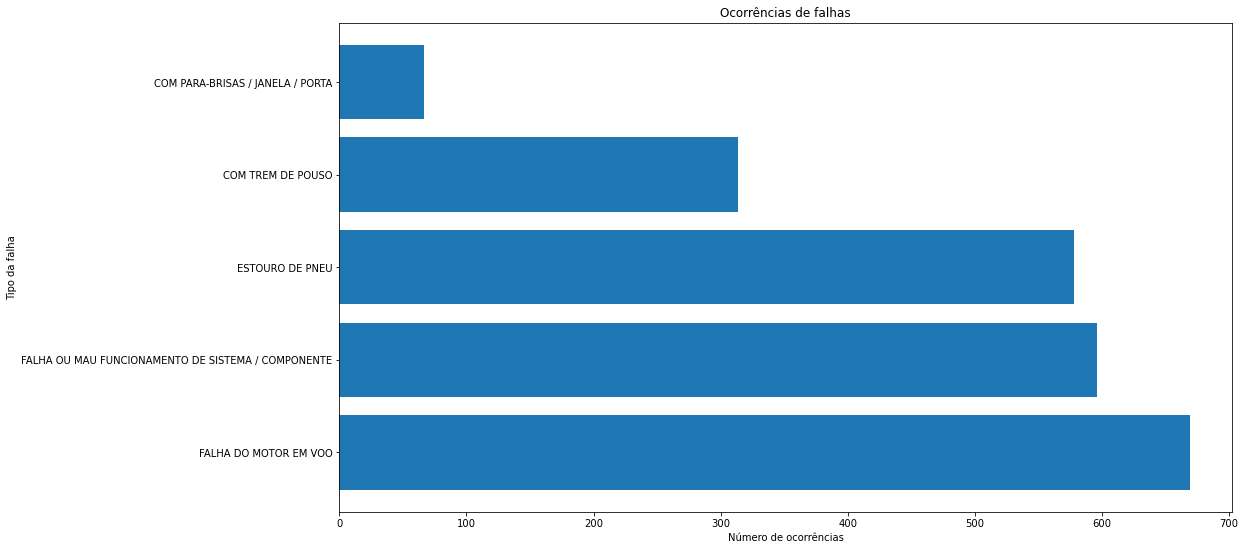

In [207]:
data_plot = df_ocorrencia_falhas.ocorrencia_tipo.value_counts().head()
plt.figure(figsize=(16,9))
plt.title("Ocorrências de falhas")
plt.xlabel('Número de ocorrências')
plt.ylabel('Tipo da falha')
plt.barh(data_plot.index, data_plot.values)

In [16]:
df_falhas_pneu_pouso = df_ocorrencia_falhas[df_ocorrencia_falhas['ocorrencia_tipo'].str.contains("PNEU|POUSO")==True].copy()
df_falhas_pneu_pouso.shape[0]

892

A falha mais comum dentre estas, é relacionada a problemas com o motor durante o voo, com falhas genéricas de Sistemas/Componentes sendo a segunda causa mais comum. Entretanto, podemos ver que Estouro de Pneu e Falhas com Trem de Pouso, ambas relacionadas ao pouso/decolagem de aeronaves, representam uma grande porção das falhas, com 892 ocorrências.

<BarContainer object of 5 artists>

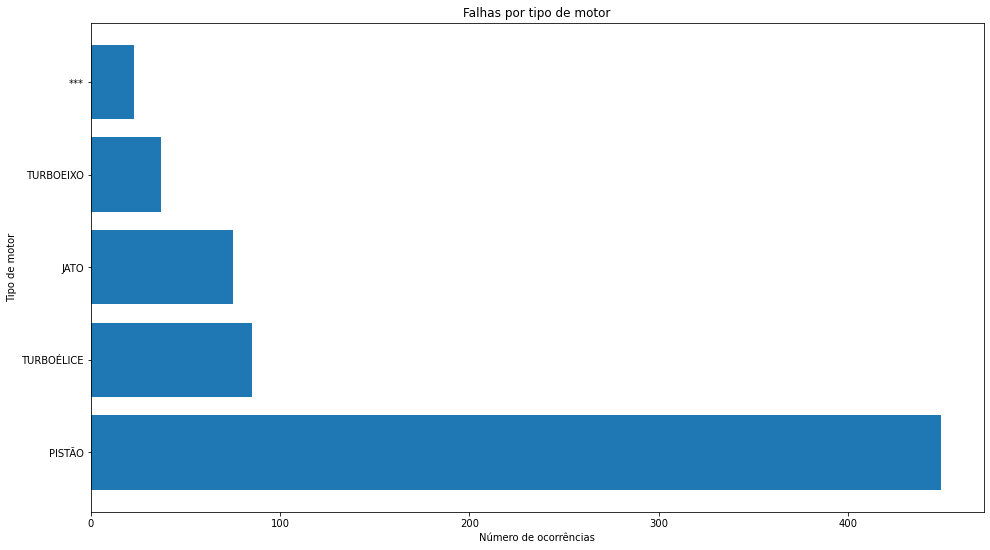

In [208]:
data_plot = df_aeronave[df_aeronave['codigo_ocorrencia2'].isin(df_falhas_motor['codigo_ocorrencia2'].values)]['aeronave_motor_tipo'].value_counts()
plt.figure(figsize=(16,9))
plt.title("Falhas por tipo de motor")
plt.xlabel('Número de ocorrências')
plt.ylabel('Tipo de motor')
plt.barh(data_plot.index, data_plot.values)

Olhando mais aprofundadamente para estas falhas de motor é possível ver que dentre estas falhas, a vasta maioria ocorre com motores do tipo PISTÃO.

In [31]:
df_falhas_pneu_pouso.rename(columns={'codigo_ocorrencia1': 'codigo_ocorrencia2'}, inplace=True)
df_falhas_pneu_pouso = df_falhas_pneu_pouso.merge(df_aeronave[['codigo_ocorrencia2', 'aeronave_fatalidades_total']], on='codigo_ocorrencia2')

In [37]:
mortes_falha_pneu_pouso = df_falhas_pneu_pouso['aeronave_fatalidades_total'].sum()
print(f"Temos {mortes_falha_pneu_pouso} mortes em acidentes envolvendo falhas de PNEU ou TREM DE POUSO")

Temos 0 mortes em acidentes envolvendo falhas de PNEU ou TREM DE POUSO


In [45]:
df_falhas_motor = df_ocorrencia_falhas.query('ocorrencia_tipo == "FALHA DO MOTOR EM VOO"').copy()
df_falhas_motor.rename(columns={'codigo_ocorrencia1': 'codigo_ocorrencia2'}, inplace=True)
df_falhas_motor = df_falhas_motor.merge(df_aeronave[['codigo_ocorrencia2', 'aeronave_fatalidades_total']], on='codigo_ocorrencia2')

In [46]:
mortes_falhas_sistema_componente = df_falhas_sistema_componente['aeronave_fatalidades_total'].sum()
print(f"Temos {mortes_falhas_motor} mortes em acidentes envolvendo falhas de MOTOR EM VOO")

Temos 107 mortes em acidentes envolvendo falhas de MOTOR EM VOO


In [42]:
df_falhas_sistema_componente = df_ocorrencia_falhas.query('ocorrencia_tipo == "FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE"').copy()
df_falhas_sistema_componente.rename(columns={'codigo_ocorrencia1': 'codigo_ocorrencia2'}, inplace=True)
df_falhas_sistema_componente = df_falhas_sistema_componente.merge(df_aeronave[['codigo_ocorrencia2', 'aeronave_fatalidades_total']], on='codigo_ocorrencia2')

In [47]:
mortes_falhas_sistema_componente = df_falhas_sistema_componente['aeronave_fatalidades_total'].sum()
print(f"Temos {mortes_falhas_sistema_componente} mortes em acidentes envolvendo falhas de COMPONENTES/SISTEMA")

Temos 16 mortes em acidentes envolvendo falhas de COMPONENTES/SISTEMA


Se utilizarmos as informações da planilha `aeronave.csv` podemos então verificar que neste tipo de falhas, não ocorrem mortes, coincidindo com a ideia que estes tipos de acidentes ocorrem em proximidade ao solo, sem grandes riscos aos envolvidos.

In [61]:
total_mortes = df_aeronave.aeronave_fatalidades_total.sum()
print(f"Total de mortes no período: {total_mortes}")

Total de mortes no período: 768


<BarContainer object of 5 artists>

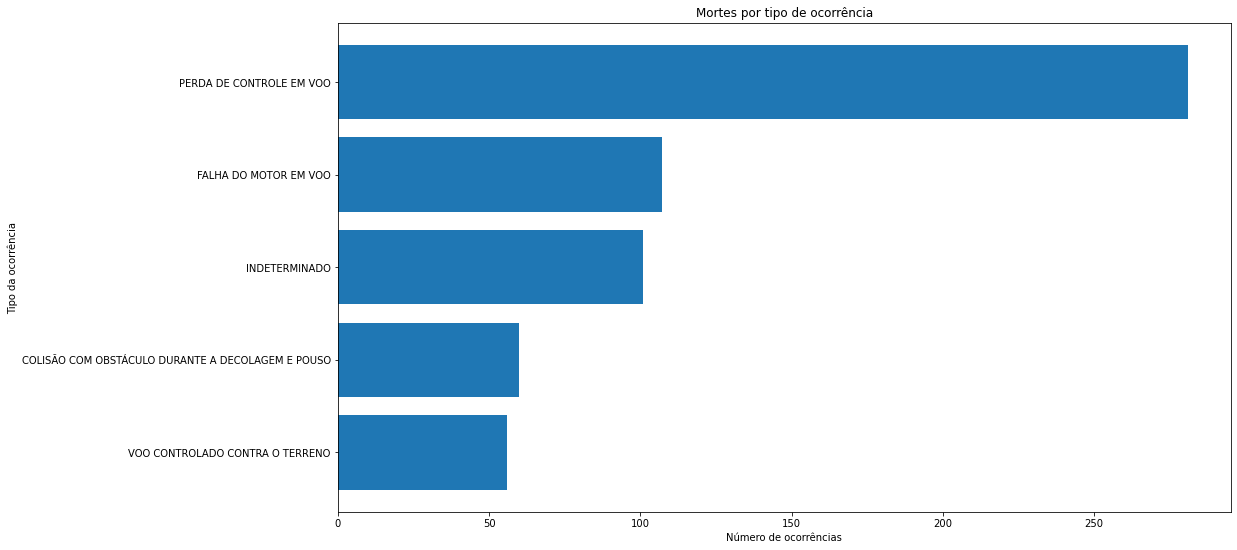

In [209]:
data_plot = df_aeronave.merge(df_ocorrencia_tipo.rename(columns={'codigo_ocorrencia1': 'codigo_ocorrencia2'}), on='codigo_ocorrencia2').groupby('ocorrencia_tipo')['aeronave_fatalidades_total'].sum().sort_values().tail()
plt.figure(figsize=(16,9))
plt.title("Mortes por tipo de ocorrência")
plt.xlabel('Número de ocorrências')
plt.ylabel('Tipo da ocorrência')
plt.barh(data_plot.index, data_plot.values)

Como podemos observar no gráfico acima, embora falhas representem cerca de metade dos incidentes, podemos ver que geralmente não resultam em fatalidades. A maior causa de fatalidades ocorre com perda de controle em voo, significativamente mais representativa das fatalidades que falhas de motor em voo.

## Análise das aeronaves envolvidas em ocorrências

### Modelos de aeronaves

<BarContainer object of 738 artists>

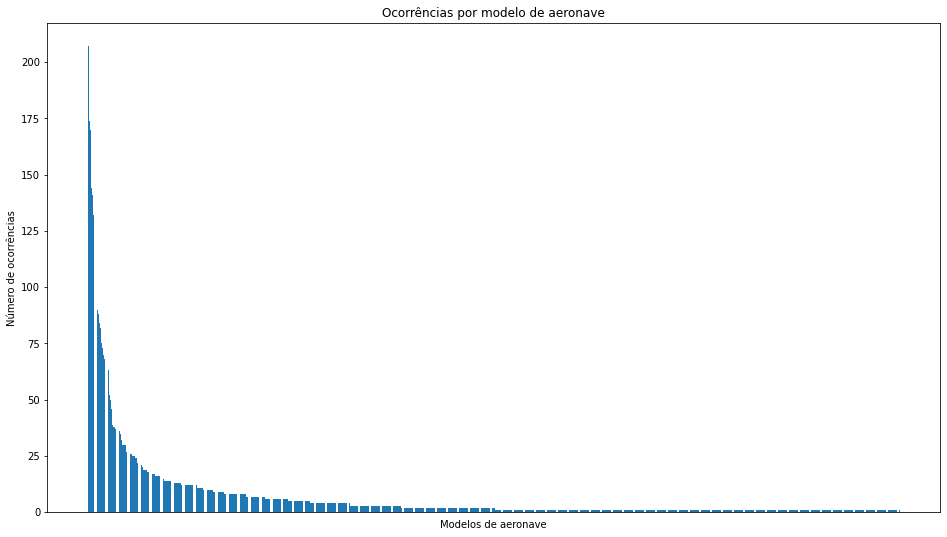

In [212]:
data_plot = df_aeronave.aeronave_modelo.value_counts()
plt.figure(figsize=(16,9))
plt.title("Ocorrências por modelo de aeronave")
plt.ylabel('Número de ocorrências')
plt.xlabel('Modelos de aeronave')
plt.xticks([])
plt.bar(data_plot.index, data_plot.values)

In [213]:
print(f"Quantidade de modelos de aeronaves: {df_aeronave.aeronave_modelo.unique().shape[0]}")

Quantidade de modelos de aeronaves: 738


Temos 738 modelos de aeronaves envolvidas em ocorrências nos períodos, visto como estes estão distribuídos no gráfico acima e como o número de modelo é bem alto, podemos analisar mais detalhadamente apenas aquelas cuja ocorrência é maior

<BarContainer object of 15 artists>

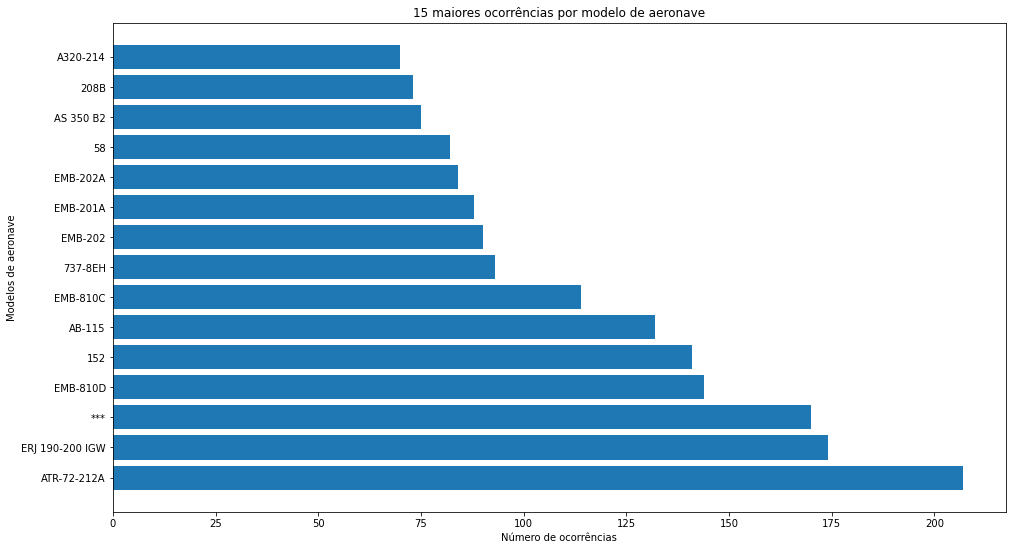

In [217]:
data_plot = df_aeronave.aeronave_modelo.value_counts().head(15)
plt.figure(figsize=(16,9))
plt.title("15 maiores ocorrências por modelo de aeronave")
plt.xlabel('Número de ocorrências')
plt.ylabel('Modelos de aeronave')
plt.barh(data_plot.index, data_plot.values)

In [96]:
df_aeronaves_desconhecidas = df_aeronave.query('aeronave_modelo == "***"')
print(f"Número de incidentes envolvendo aeronaves de modelo desconhecido: {df_aeronaves_desconhecidas.shape[0]}")

Número de incidentes envolvendo aeronaves de modelo desconhecido: 170


Aparentemente, temos um grande número de incidentes envolvendo aeronaves cujo modelo é desconhecido (supondo que "\*\*\*" implique em modelos desconhecidos)

<BarContainer object of 5 artists>

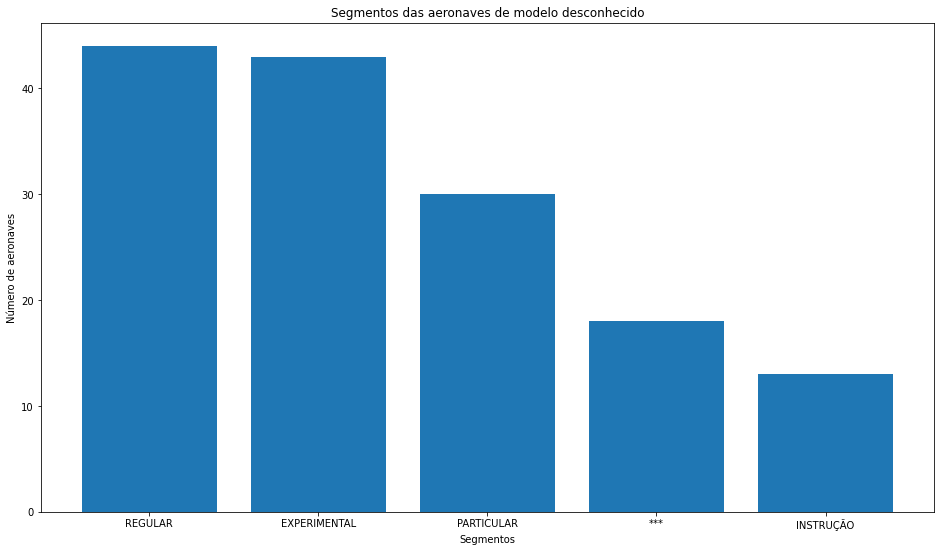

In [218]:
data_plot = df_aeronaves_desconhecidas.aeronave_registro_segmento.value_counts().head()
plt.figure(figsize=(16,9))
plt.title("Segmentos das aeronaves de modelo desconhecido")
plt.ylabel('Número de aeronaves')
plt.xlabel('Segmentos')
plt.bar(data_plot.index, data_plot.values)

No caráter destas aeronaves de modelo desconhecido, me chama a atenção que grande parte das aeronaves de modelo desconhecido é do segmento "REGULAR", visto que aeronaves de caráter Experimental, Particular ou de Instrução possuem maior plausibilidade de não serem identificadas

### Nível de danos nas aeronaves

<BarContainer object of 5 artists>

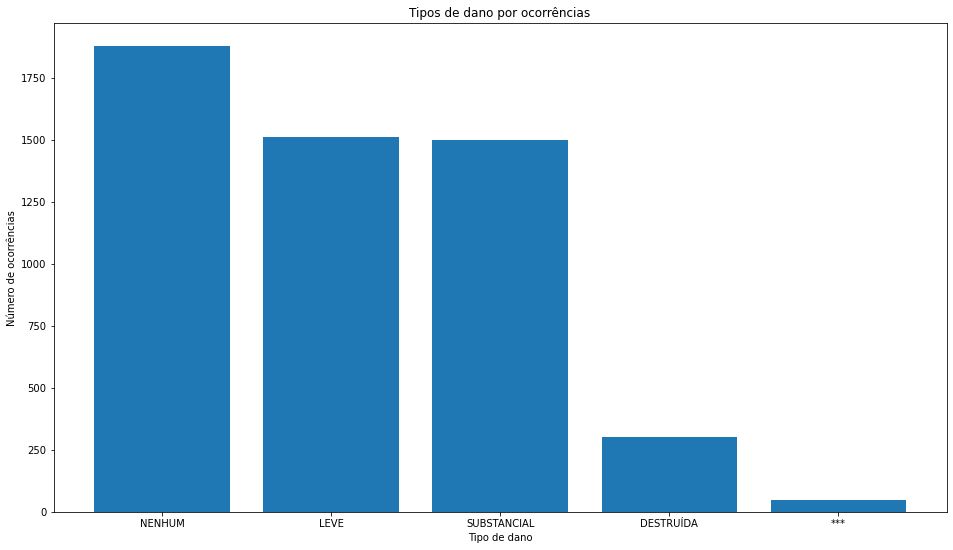

In [219]:
data_plot = df_aeronave.aeronave_nivel_dano.value_counts()
plt.figure(figsize=(16,9))
plt.title("Tipos de dano por ocorrências")
plt.ylabel('Número de ocorrências')
plt.xlabel('Tipo de dano')
plt.bar(data_plot.index, data_plot.values)

<BarContainer object of 5 artists>

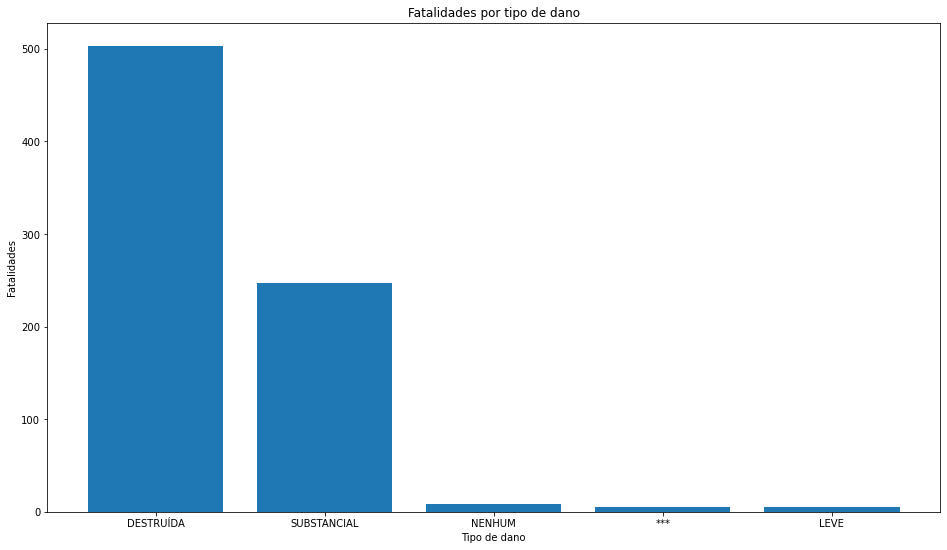

In [301]:
data_plot = df_aeronave.groupby('aeronave_nivel_dano')['aeronave_fatalidades_total'].sum().sort_values(ascending=False)
plt.figure(figsize=(16,9))
plt.title("Fatalidades por tipo de dano")
plt.ylabel('Fatalidades')
plt.xlabel('Tipo de dano')
plt.bar(data_plot.index, data_plot.values)

In [303]:
df_substancial_destruida = df_aeronave[df_aeronave['aeronave_nivel_dano'].isin(['SUBSTANCIAL', 'DESTRUIDA'])]

In [311]:
df_substancial_destruida = df_substancial_destruida.rename(columns={'codigo_ocorrencia2': 'codigo_ocorrencia1'}).merge(df_ocorrencia_tipo, on='codigo_ocorrencia1')

<BarContainer object of 10 artists>

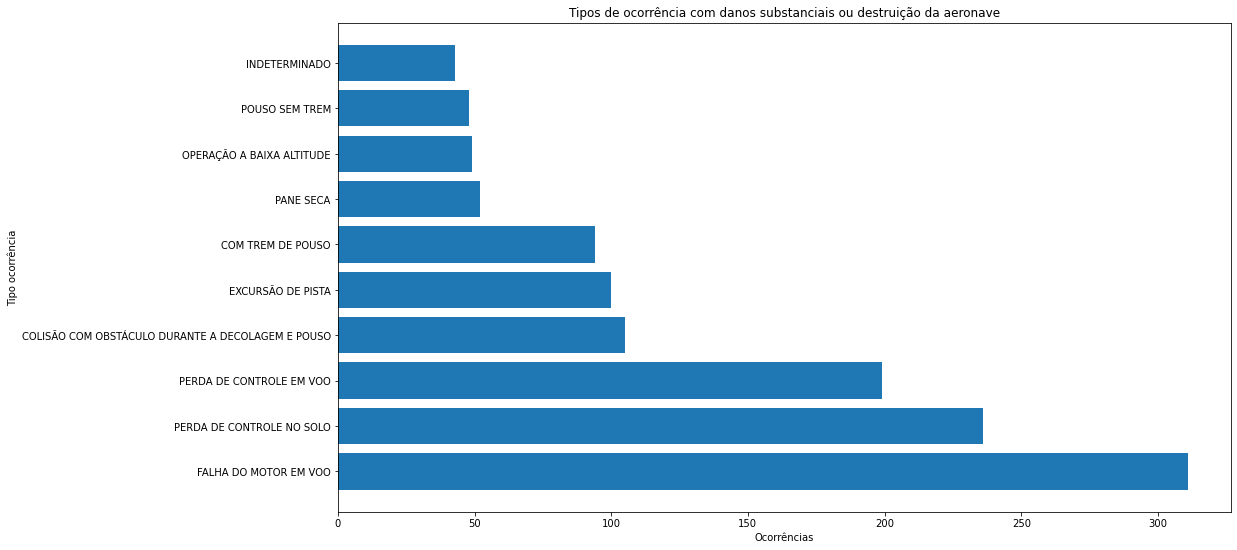

In [320]:
data_plot = df_substancial_destruida.ocorrencia_tipo.value_counts().head(10)
plt.figure(figsize=(16,9))
plt.title("Tipos de ocorrência com danos substanciais ou destruição da aeronave")
plt.xlabel('Ocorrências')
plt.ylabel('Tipo ocorrência')
plt.barh(data_plot.index, data_plot.values)

### Anos de fabricação das aeronaves

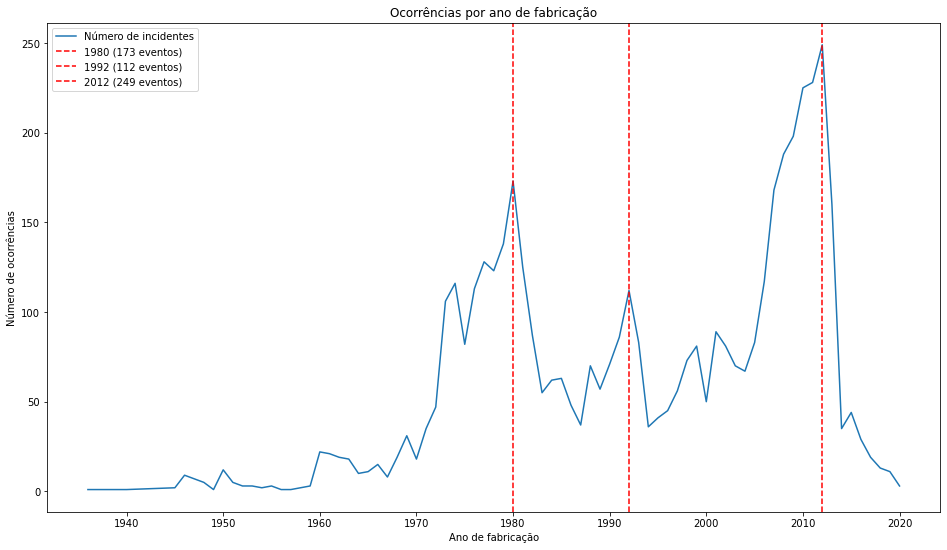

In [245]:
data_plot = pd.to_datetime(df_aeronave.aeronave_ano_fabricacao, format='%Y', errors='coerce').value_counts().sort_index()
fig = plt.figure(figsize=(16,9))
peaks = find_peaks(data_plot, prominence=50)[0]
plt.title("Ocorrências por ano de fabricação")
plt.ylabel('Número de ocorrências')
plt.xlabel('Ano de fabricação')
plt.plot(data_plot.index, data_plot.values, label='Número de incidentes')
for peak in peaks:
    peak_year = data_plot.index[peak]
    plt.axvline(peak_year, color='red', ls='--', label=f"{peak_year.year} ({data_plot[peak_year]} eventos)")
plt.legend()

No gráfico acima, podemos ver que um grande pico no número de acidentes ocorrendo para aeronaves fabricadas entre 2004 e 2012. Dado que os incidentes ocorreram no período de 2012 a 2021, isso provavelmente se deve à quantidade de aeronaves produzidas nesse período de 2004 a 2012 que se encontravam ativas, sendo que muitos modelos mais antigos já devem ter sido aposentados neste ponto, com modelos mais novos ainda não tendo tão grande adoção. É interessante notar, no entanto, que há outros picos que se destacam para modelos do ano de 1980 e 1992, com cerca de 173 e 112 ocorrências neste período.

In [278]:
df_aeronave.query('aeronave_ano_fabricacao == 1980.0')['aeronave_fabricante'].value_counts()

CESSNA AIRCRAFT                50
NEIVA INDUSTRIA AERONAUTICA    45
EMBRAER                        26
BOEING COMPANY                 12
BEECH AIRCRAFT                 10
PIPER AIRCRAFT                 10
LEARJET                         5
SIKORSKY AIRCRAFT               4
BELL HELICOPTER                 3
ISRAEL AIRCRAFT                 2
TWIN COMMANDER                  2
HAWKER BEECHCRAFT               2
HELIBRAS                        1
MCDONNELL DOUGLAS               1
Name: aeronave_fabricante, dtype: int64

In [286]:
df_aeronave.query('aeronave_ano_fabricacao == 1980.0 & aeronave_fabricante == "CESSNA AIRCRAFT"')['aeronave_modelo'].value_counts()

152      28
T188C     5
172RG     3
210N      3
182Q      3
U206G     3
T210N     2
172N      1
A188B     1
550       1
Name: aeronave_modelo, dtype: int64

Realizando algumas queries é possível ver que dois fabricantes se destacam em para as aeronaves produzidas nesse período, CESSNA e NEIVA. Analisando maix detalhadamente, podemos também observar que o modelo CESSNA 152 é o de maior recorrência e, com uma breve pesquisa, é possível encontrar a possível razão:

"O Cessna 152 é consagrado mundialmente como a melhor aeronave treinadora inicial de pilotos."
                                                                        - EJ Escola de Aeronáutica Civil

In [287]:
df_aeronave.query('aeronave_ano_fabricacao == 1980.0 & aeronave_fabricante == "NEIVA INDUSTRIA AERONAUTICA"')['aeronave_modelo'].value_counts()

EMB-712      21
EMB-201A      7
EMB-711ST     6
EMB-711T      6
EMB-721C      2
EMB-720D      1
EMB-711B      1
EMB-720C      1
Name: aeronave_modelo, dtype: int64

Já para a segunda fabricante, encontramos o modelo NEIVA EMB-712 que possívelmente tem alto nível de popularidade por outra razão, sendo "considerado o mais barato e simples avião de turismo do país" segundo o Wikipédia.